In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [2]:
df = pd.read_csv('/content/scores_data.csv')
df

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7
...,...,...,...
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7


Understanding the Dataset Structure

In [3]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [4]:
df.tail()

,Batch,User_ID,Score
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7
148,AI_ELITE_4,uid_1,2 / 7


In [5]:
df.dtypes

,0
Batch,object
User_ID,object
Score,object


In [7]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


### Columns
- **Batch** - Categorical
- **User_ID** - Categorical (Identifier)
- **Score** - Needs preprocessing

Data Cleaning (Important Step)
- Convert Score into numeric columns
- The Score column is in string format so, we can not analyze or calculate using this format directly so we will :
    - Split the score
    - Convert values to numbers
    - Remove the original column

In [9]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [10]:
df.columns = ['Batch', 'User_ID', 'Score']
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [11]:
df['Score'].head()

,Score
0,6 / 7
1,6 / 7
2,7 / 7
3,7 / 7
4,4 / 7


In [12]:
# Split the Score Column into Obtained and Total

df[['Obtained', 'Total']] = df['Score'].str.split('/', expand=True)
df['Obtained']
df['Total']

,Total
0,7
1,7
2,7
3,7
4,7
...,...
144,7
145,7
146,7
147,7


- **Explanation:**
    - Values are currently strings ("6", "7")
    - .astype(int) converts them into numbers
    - Required for mathematical operations & analysis

In [13]:
# Convert Strings to Integers

df['Obtained'] = df['Obtained'].astype(int)
df['Total'] = df['Total'].astype(int)
df.columns

Index(['Batch', 'User_ID', 'Score', 'Obtained', 'Total'], dtype='object')

In [14]:
df.dtypes

,0
Batch,object
User_ID,object
Score,object
Obtained,int64
Total,int64


In [15]:
# Remove the Original Score Column

# Safely remove Score column
df.drop(columns=['Score'], inplace=True, errors='ignore')
df

,Batch,User_ID,Obtained,Total
0,AI_ELITE_7,uid_149,6,7
1,AI_ELITE_7,uid_148,6,7
2,AI_ELITE_7,uid_147,7,7
3,AI_ELITE_7,uid_146,7,7
4,AI_ELITE_7,uid_145,4,7
...,...,...,...,...
144,AI_ELITE_4,uid_5,4,7
145,AI_ELITE_4,uid_4,4,7
146,AI_ELITE_4,uid_3,4,7
147,AI_ELITE_4,uid_2,3,7


Univariate Analysis
### Numerical Variables (Non - Visual)

In [16]:
df[['Obtained', 'Total']].describe()

,Obtained,Total
count,149.000000,149.0
mean,4.382550,7.0
std,1.592199,0.0
min,0.000000,7.0
25%,3.000000,7.0
50%,4.000000,7.0
75%,5.000000,7.0
max,7.000000,7.0


- Insights:
    - Mean score obtained
    - Min & max scores
    - Distribution spread

## Numerical Variables (Visual)

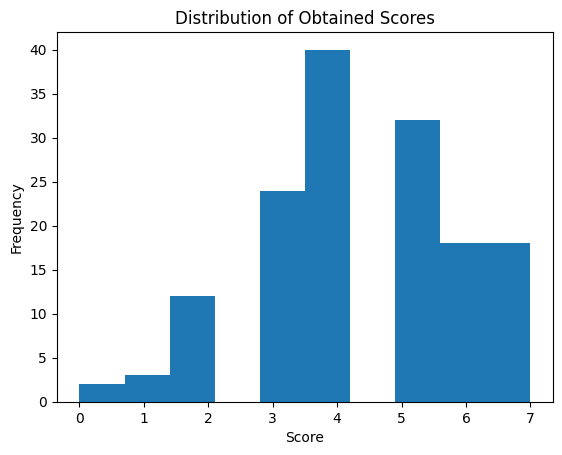

In [17]:
import matplotlib.pyplot as plt

plt.hist(df['Obtained'])
plt.title("Distribution of Obtained Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

### Categorical Variables (Non - Visual)

In [18]:
df['Batch'].value_counts()

,count
Batch,
AI_ELITE_7,53
AI_ELITE_6,48
AI_ELITE_4,48


### Categorical Variables (Visual)

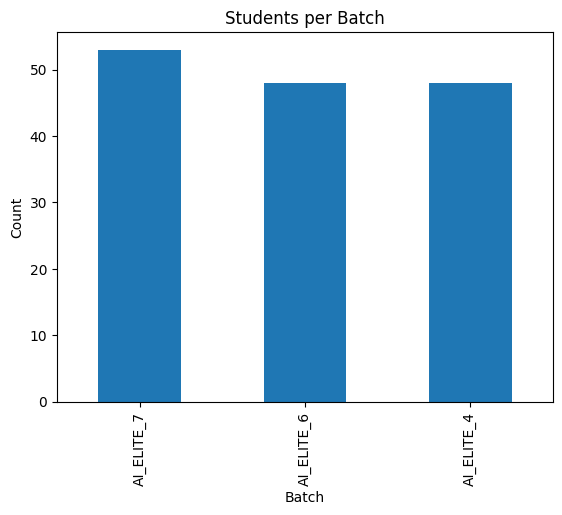

In [19]:
df['Batch'].value_counts().plot(kind='bar')
plt.title("Students per Batch")
plt.xlabel("Batch")
plt.ylabel("Count")
plt.show()

Bivariate Analysis
- Numerical vs Numerical

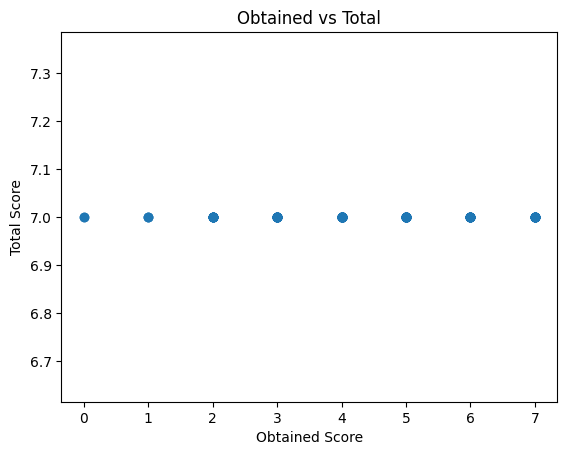

In [20]:
plt.scatter(df['Obtained'], df['Total'])
plt.xlabel("Obtained Score")
plt.ylabel("Total Score")
plt.title("Obtained vs Total")
plt.show()

- insight:
    - Total score is constant
    - Obtained score varies among users

### Numerical vs Categorical

In [21]:
df.groupby('Batch')['Obtained'].mean()

,Obtained
Batch,
AI_ELITE_4,3.791667
AI_ELITE_6,4.229167
AI_ELITE_7,5.056604


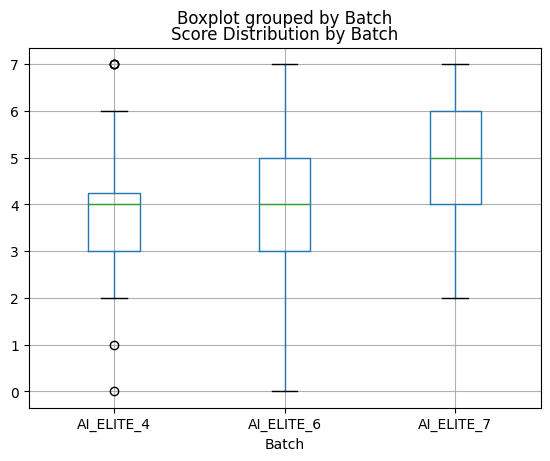

In [22]:
df.boxplot(column='Obtained', by='Batch')
plt.title("Score Distribution by Batch")
plt.show()

- Insight:
    - Compare performance across batches

### Categorical vs Categorical

In [23]:
pd.crosstab(df['Batch'], df['Obtained'])

Obtained,0,1,2,3,4,5,6,7
Batch,,,,,,,,
AI_ELITE_4,1,1,7,8,19,8,1,3
AI_ELITE_6,1,2,3,9,11,13,4,5
AI_ELITE_7,0,0,2,7,10,11,13,10


- Insight:
    - Distribution of scores per batch

### Key Insights from the Dataset
- The majority of students fall within a common score range.
- Extreme scores (very low or very high) are less frequent.
- This indicates a normal distribution of performance.
- Batch performance is consistent / varies.
- No missing values present.
- Dataset is clean and well-Structured.
- Score preprocessing was required.
- Majority performance is good.
- Overall, the dataset is well-suited for detailed student performance analysis.